<a href="https://colab.research.google.com/github/pavi-ninjaac/Kaggle/blob/main/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of content
### 1) Data Loading:
 a)Install Libraries
b) Load data
 c) Concat train and test
d) Statsitical Summary

In [ ]:
# Install Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load file from local system
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [7]:
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']),index_col=0)

In [8]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [9]:

test = pd.read_csv(io.BytesIO(uploaded['test.csv']),index_col=0)

In [10]:
print("Train dataset shape -->",train.shape)
print("Test dataset shape --->",test.shape)

Train dataset shape --> (891, 11)
Test dataset shape ---> (418, 10)


concadinate train and test data so that it is easy to make transforations on data

In [11]:
#concadinate train and test data
data = pd.concat([train,test],axis = 0).reset_index(drop = True)
print("Combined dataset shape-->",data.shape)

Combined dataset shape--> (1309, 11)


In [12]:
# Statistical Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


There are 5 Object type features are present so they need to be handled by feature engineering.

In [13]:
data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 2) Explotary Data Analysis (EDA)
a)EDA b)correlation with target value

First let's see the distribution of survived in data by Pclass.
Here you can clearly see that the <b>Pclass 3 has the higest number of passengers 491 which is 55.11% of total but the survival rate is only 24.24%. In Pclass 1 Total number of passengers are 216 bu the survival rate is 62.96% that shows lot of people traveled in the Pclass 1 is survived</b>.

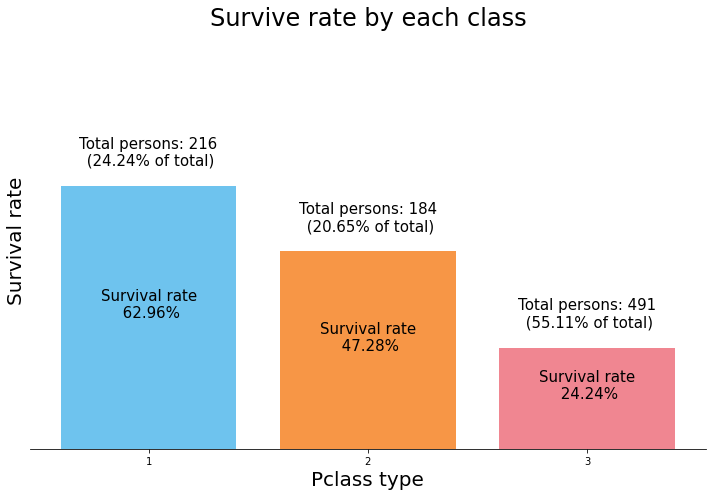

In [17]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot()

ax.set_ylim(0,1)

pclass_gp = train.groupby('Pclass')['Survived'].agg([np.mean , len]).reset_index()

Pclass_x = pclass_gp['Pclass'].values
height_y = pclass_gp['mean'].values
no_persons = pclass_gp['len'].values
total_percent = no_persons/sum(pclass_gp['len'])
colors = ["#6EC3EE", "#F79646", "#F08691"]

#plot the bar chart
ax.bar(x=Pclass_x , height  = height_y , color = colors)

#set the font style
fontdict = {'horizontalalignment': 'center', "fontsize":"15"}

for x , y , person , total_person in zip(Pclass_x,height_y,no_persons,total_percent):
    text = f"Total persons: {person}\n ({round(total_person*100, 2)}% of total)"
    ax.text(x, y + .05, s = text, fontdict = fontdict)
    
    text = f"Survival rate\n {round(y*100,2)}%"
    ax.text(x,y/2,s=text , fontdict = fontdict)
#set the ticks 
ax.set_xticks([1, 2, 3])
ax.set_yticks([])

#set the labels
ax.set_xlabel("Pclass type", size = 20)
ax.set_ylabel("Survival rate", size = 20)

# remove the spines
ax.spines["top"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["right"].set_color("None")

ax.set_title("Survive rate by each class", size = 24)
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


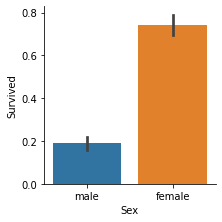

In [20]:
# distribution of the sex
sns.factorplot(x="Sex", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [21]:
data.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

The C Embarked has the high survival rate <b> it has totally 270 passengers from those people 93 people are survived so it has he high 55.35% survival rate</b>. 'S' Embarked has the low 33.69% survival rate it has the large passenger list of 914 and from that only 217 where survived.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


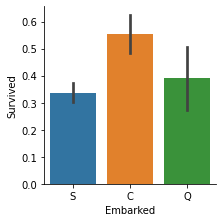

,mean,len,sum
Embarked,,,
C,0.553571,270.0,93.0
Q,0.389610,123.0,30.0
S,0.336957,914.0,217.0


In [29]:
# distribution of the Embarked
sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()
data.groupby('Embarked')['Survived'].agg([np.mean,len,sum])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


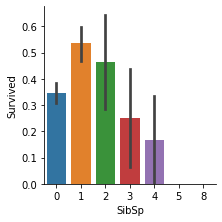

,mean,len,sum
SibSp,,,
0,0.345395,891.0,210.0
1,0.535885,319.0,112.0
2,0.464286,42.0,13.0
3,0.250000,20.0,4.0
4,0.166667,22.0,3.0
5,0.000000,6.0,0.0
8,0.000000,9.0,0.0


In [31]:
# distribution of the SibSp
sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()
data.groupby('SibSp')['Survived'].agg([np.mean,len,sum])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


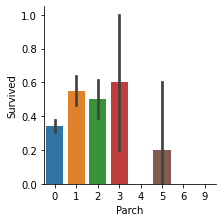

,mean,len,sum
Parch,,,
0,0.343658,1002.0,233.0
1,0.550847,170.0,65.0
2,0.500000,113.0,40.0
3,0.600000,8.0,3.0
4,0.000000,6.0,0.0
5,0.200000,6.0,1.0
6,0.000000,2.0,0.0
9,NaN,2.0,0.0


In [33]:
# distribution of the Parch 
sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()
data.groupby('Parch')['Survived'].agg([np.mean,len,sum])